In [2]:
import Ridge
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


# Read Data

In [3]:
Boston_House = 'bostonhouse.csv'
data = pd.read_csv(Boston_House, encoding='CP949')

In [4]:
data

,癤풠RIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
variate_name = data.columns

In [6]:
data = data.to_numpy()

In [7]:
print("Total data shape is", data.shape)
print("The number of sample is ",len(data[:,0]))
print("Feature names are", variate_name)
price = data[:,13]
feature = data[:,:13]


Total data shape is (506, 14)
The number of sample is  506
Feature names are Index(['癤풠RIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


### Data visualization

Text(0.5, 0, 'LSTAT')

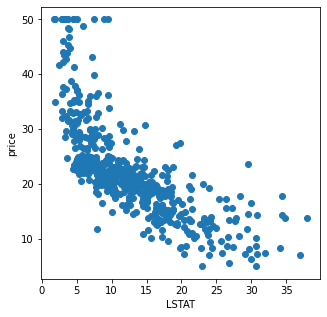

In [8]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(data[:,12], price)
plt.ylabel('price')
plt.xlabel('LSTAT')

/Users/munjungkim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/munjungkim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/munjungkim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30308 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/munjungkim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54432 missing from current font.
  font.set_text(s, 0, flags=flags)


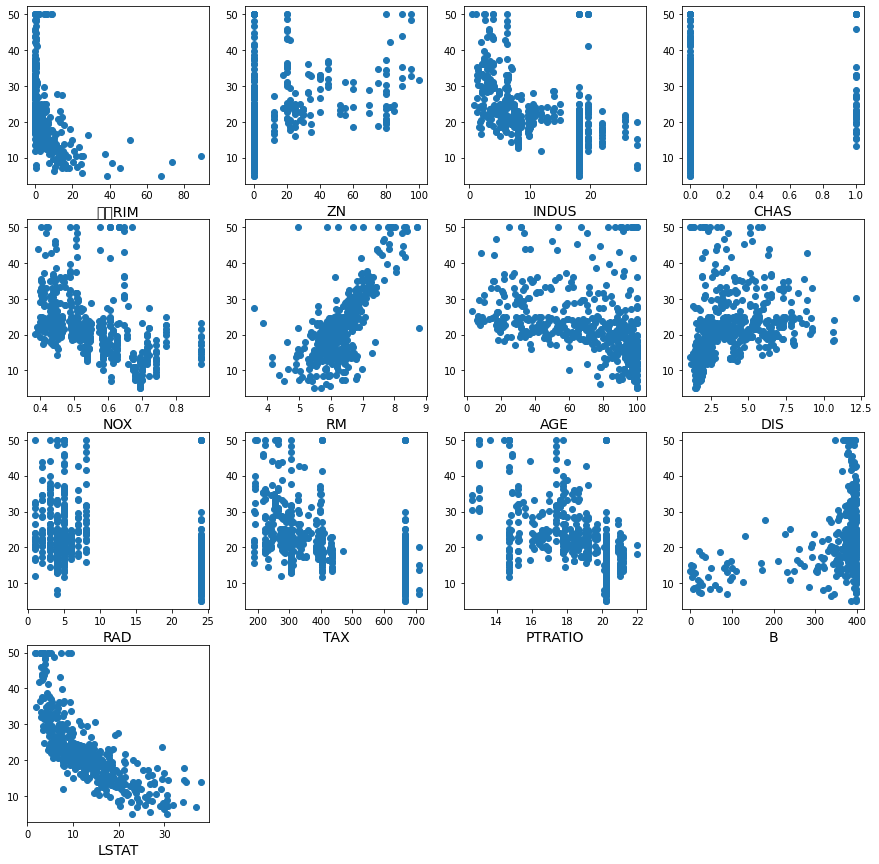

In [9]:

plt.rcParams["figure.figsize"] = (15,15)
fig = plt.figure()
for i in range(13):
    plt.subplot(4, 4, i+1)
    plt.xlabel(variate_name[i],fontsize=14)
    plt.scatter(data[:,i], price)
    
plt.savefig('price_variate.png')
    

# Ridge regression ( train = 0.8)

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy import stats
import statistics


# divide test data and train data
X_train, X_test, Y_train, Y_test = train_test_split(feature, price, test_size=0.2, random_state=1)

# training
X_norm = stats.zscore(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_mean = np.mean(X_train,axis=0)

beta_ridge, beta_0 = Ridge.solve(X_norm, Y_train,0.1)


In [11]:
# test
test_norm = (X_test-X_mean)/X_std
Y_pred = np.matmul(test_norm, beta_ridge)+beta_0

mse = mean_squared_error(Y_test, Y_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  23.380713838510545 4.83536077645821


In [12]:
print(beta_0, beta_ridge)
print(np.abs(beta_ridge))
print(np.argsort(np.abs(beta_ridge)))

22.52227722772277 [-1.02556464  1.34772165  0.12246444  0.5756498  -2.28222369  2.13231277
  0.12593524 -3.17448451  2.63736604 -1.86851972 -2.14198038  0.66935237
 -3.92345004]
[1.02556464 1.34772165 0.12246444 0.5756498  2.28222369 2.13231277
 0.12593524 3.17448451 2.63736604 1.86851972 2.14198038 0.66935237
 3.92345004]
[ 2  6  3 11  0  1  9  5 10  4  8  7 12]


In [13]:
print("standard deviation of test price : ", np.std(Y_test,axis=0))

standard deviation of test price :  9.941196581176241


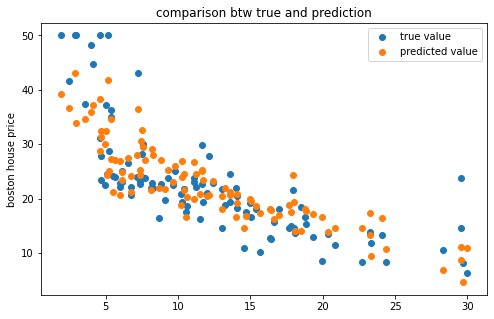

In [14]:
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(X_test[:,12], Y_test, label='true value')
plt.scatter(X_test[:,12],Y_pred,label = 'predicted value')
plt.ylabel('boston house price')
plt.title('comparison btw true and prediction')
plt.legend()
plt.show()


In [15]:
lambda_list = np.linspace(0,100,1000)


rmse_l = []
for a in lambda_list:
    beta_ridge, beta_0 = Ridge.solve(X_norm, Y_train,a)
    
    #test data
    
    test_norm = (X_test-X_mean)/X_std
    Y_pred = np.matmul(test_norm, beta_ridge)+beta_0

    mse = mean_squared_error(Y_test, Y_pred)

    #print("Lambda : ",a,"Result MSE, RMSE ",mse, np.sqrt(mse))
    rmse_l.append(np.sqrt(mse))
    

Text(0.5, 1.0, '$\\lambda$ dependency')

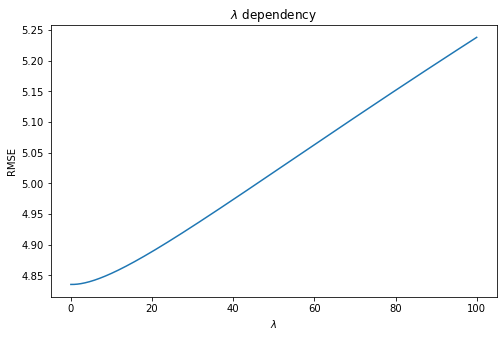

In [16]:
plt.plot(lambda_list.tolist(),rmse_l)
plt.xlabel('$\lambda$')
plt.ylabel('RMSE')
plt.title('$\lambda$ dependency')

0.3003003003003003
4.835353898202496


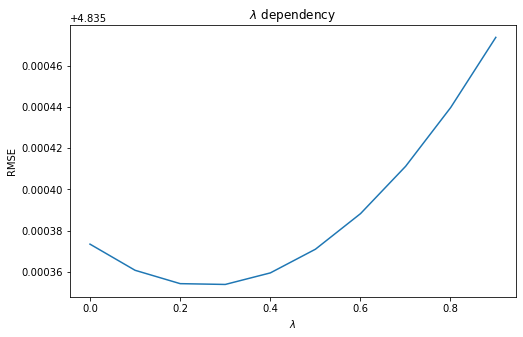

In [17]:
plt.plot(lambda_list.tolist()[:10],rmse_l[:10])
plt.xlabel('$\lambda$')
plt.ylabel('RMSE')
plt.title('$\lambda$ dependency')
print(lambda_list.tolist()[np.where(rmse_l==min(rmse_l))[0][0]])
print(rmse_l[np.where(rmse_l==min(rmse_l))[0][0]])

# Ridge regression (insufficient data, train = 0.4)

In [18]:
# divide test data and train data small data
X_train, X_test, Y_train, Y_test = train_test_split(feature, price, test_size=0.6, random_state=1)

# training
X_norm = stats.zscore(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_mean = np.mean(X_train,axis=0)

#beta_ridge, beta_0 = Ridge.solve(X_norm, Y_train,19.71971971971972)




In [19]:
# test
test_norm = (X_test-X_mean)/X_std
Y_pred = np.matmul(test_norm, beta_ridge)+beta_0

mse = mean_squared_error(Y_test, Y_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  23.90000368492257 4.888763001508926


In [20]:
print(beta_0, beta_ridge)
print(np.abs(beta_ridge))
print(np.argsort(np.abs(beta_ridge)))

22.52227722772277 [-0.69399039  0.62869668 -0.43894331  0.62387273 -0.92302102  2.37222095
 -0.20351184 -1.44769318  0.51833553 -0.40800428 -1.67275193  0.62886123
 -2.85236448]
[0.69399039 0.62869668 0.43894331 0.62387273 0.92302102 2.37222095
 0.20351184 1.44769318 0.51833553 0.40800428 1.67275193 0.62886123
 2.85236448]
[ 6  9  2  8  3  1 11  0  4  7 10  5 12]


In [21]:
print("standard deviation of test price : ", np.std(Y_test,axis=0))

standard deviation of test price :  9.229793194323062


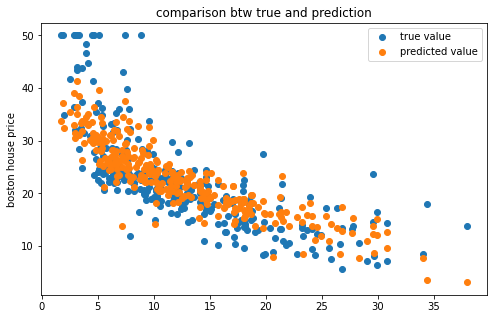

In [22]:
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(X_test[:,12], Y_test, label='true value')
plt.scatter(X_test[:,12],Y_pred,label = 'predicted value')
plt.ylabel('boston house price')
plt.title('comparison btw true and prediction')
plt.legend()
plt.show()



# Lambda dependence

In [23]:
lambda_list = np.linspace(0,100,100)


rmse_l = []
for a in lambda_list:
    beta_ridge, beta_0 = Ridge.solve(X_norm, Y_train,a)
    
    #test data
    
    test_norm = (X_test-X_mean)/X_std
    Y_pred = np.matmul(test_norm, beta_ridge)+beta_0

    mse = mean_squared_error(Y_test, Y_pred)

    #print("Lambda : ",a,"Result MSE, RMSE ",mse, np.sqrt(mse))
    rmse_l.append(np.sqrt(mse))
    

5.050505050505051


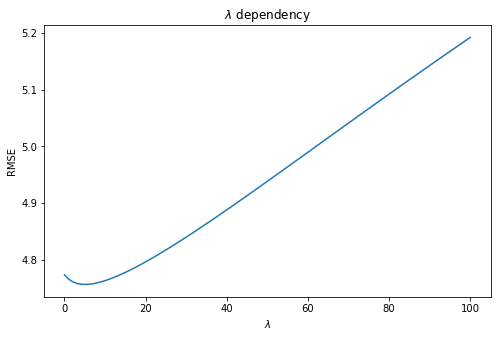

In [24]:
plt.plot(lambda_list.tolist(),rmse_l)
plt.xlabel('$\lambda$')
plt.ylabel('RMSE')
plt.title('$\lambda$ dependency')
print(lambda_list.tolist()[np.where(rmse_l==min(rmse_l))[0][0]])

In [25]:
print(beta_0, beta_ridge)
print(np.abs(beta_ridge))
print(np.argsort(np.abs(beta_ridge)))

22.443564356435644 [-0.53775452  0.54724366 -0.58011326  0.45636937 -0.62631922  2.25372228
  0.00331609 -0.75367238  0.40066996 -0.25569365 -1.35268975  0.46824867
 -2.61485089]
[0.53775452 0.54724366 0.58011326 0.45636937 0.62631922 2.25372228
 0.00331609 0.75367238 0.40066996 0.25569365 1.35268975 0.46824867
 2.61485089]
[ 6  9  8  3 11  0  1  2  4  7 10  5 12]


# Ridge regression (train = 0.3)

In [26]:
# divide test data and train data small data
X_train, X_test, Y_train, Y_test = train_test_split(feature, price, test_size=0.7, random_state=1)

# training
X_norm = stats.zscore(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_mean = np.mean(X_train,axis=0)

#beta_ridge, beta_0 = Ridge.solve(X_norm, Y_train,19.71971971971972)





In [27]:
# test
test_norm = (X_test-X_mean)/X_std
Y_pred = np.matmul(test_norm, beta_ridge)+beta_0

mse = mean_squared_error(Y_test, Y_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  25.266896997298527 5.026618843447206


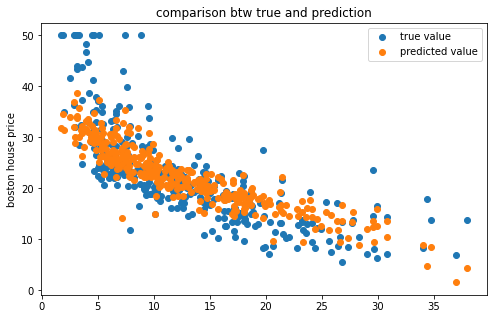

In [28]:
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(X_test[:,12], Y_test, label='true value')
plt.scatter(X_test[:,12],Y_pred,label = 'predicted value')
plt.ylabel('boston house price')
plt.title('comparison btw true and prediction')
plt.legend()
plt.show()




In [29]:
lambda_list = np.linspace(0,100,100)


rmse_l = []
for a in lambda_list:
    beta_ridge, beta_0 = Ridge.solve(X_norm, Y_train,a)
    
    #test data
    
    test_norm = (X_test-X_mean)/X_std
    Y_pred = np.matmul(test_norm, beta_ridge)+beta_0

    mse = mean_squared_error(Y_test, Y_pred)

    #print("Lambda : ",a,"Result MSE, RMSE ",mse, np.sqrt(mse))
    rmse_l.append(np.sqrt(mse))
    

20.202020202020204
4.74900446531372


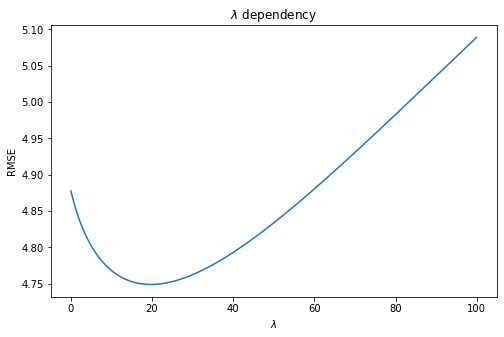

In [30]:
plt.plot(lambda_list.tolist(),rmse_l)
plt.xlabel('$\lambda$')
plt.ylabel('RMSE')
plt.title('$\lambda$ dependency')
print(lambda_list.tolist()[np.where(rmse_l==min(rmse_l))[0][0]])
print(rmse_l[np.where(rmse_l==min(rmse_l))[0][0]])

# Bias-Variance Decomposition

In [31]:
def train_set(X,Y,N,rng):
    sample_indices = np.arange(X.shape[0])
    indices = rng.choice(sample_indices,
                                   size=N,
                                   replace=False)
    return X[indices], Y[indices]


In [32]:
def bias_variance_decomp(X_train, Y_train, X_test, Y_test, num_rounds, N, random_seed, lamb):
    rng = np.random.RandomState(random_seed)
    all_pred = np.zeros((num_rounds, Y_test.shape[0]))
    beta = np.zeros((num_rounds, X_train.shape[1]))
    
    for i in range(num_rounds):
        train_x, train_y = train_set(X_train, Y_train, N, rng)
        X_norm = stats.zscore(train_x,axis=0)
        X_std = np.std(train_x,axis=0)
        X_mean = np.mean(train_x,axis=0)
            
        beta_ridge, beta_0 = Ridge.solve(X_norm, train_y, lamb)
        beta[i] = beta_ridge
        
        test_norm = (X_test-X_mean)/X_std
        Y_pred = np.matmul(test_norm, beta_ridge)+beta_0
            
        all_pred[i] = Y_pred

    avg_expected_loss = np.apply_along_axis(lambda x:mean_squared_error(x, Y_test),axis=1,arr=all_pred).mean()
    #avg_expected_loss = np.apply_along_axis(lambda x:((x - Y_test)**2).mean(),axis=1,arr=all_pred).mean()
    predictions = np.mean(all_pred, axis=0)
    avg_beta = np.mean(beta, axis = 0)

    avg_bias = np.sum((predictions - Y_test)**2)/Y_test.size
    avg_var = np.sum((predictions - all_pred)**2)/all_pred.size
    
    return avg_expected_loss, avg_bias, avg_var, avg_beta

In [33]:
def important_feature(beta_ridge):
    
    beta = np.abs(beta_ridge)
    ind = np.argsort(beta)
    ind_reverse = ind[::-1]
    return ind_reverse

In [64]:
lambda_list_log = []
for k in np.arange(-1,2,0.1):
    a = 10**k
    lambda_list_log.append(a)
    
num_lamb = len(lambda_list_log)
lambda_list = np.array(lambda_list_log)
print(lambda_list_log)

[0.1, 0.12589254117941673, 0.15848931924611134, 0.19952623149688792, 0.25118864315095796, 0.31622776601683783, 0.39810717055349715, 0.5011872336272721, 0.630957344480193, 0.7943282347242812, 0.9999999999999994, 1.2589254117941662, 1.5848931924611125, 1.9952623149688788, 2.5118864315095784, 3.162277660168376, 3.981071705534969, 5.01187233627272, 6.309573444801926, 7.943282347242805, 9.99999999999999, 12.589254117941662, 15.84893192461111, 19.95262314968877, 25.11886431509577, 31.62277660168376, 39.81071705534969, 50.118723362727145, 63.095734448019236, 79.43282347242805]


In [65]:
feature = data[:,:13]
price = data[:,13]

X_train, X_test, Y_train, Y_test = train_test_split(feature, price, test_size=0.2, random_state=1)

num_feature = 13
result = np.zeros((num_feature, num_lamb, 3)) # 3 ; avg_expected_loss, avg_bias, avg_var
beta_record = np.zeros((1,num_feature)) # 람다에 따라 beta가 어떻게 바뀌는지 관찰해보자

for i in range(num_lamb):
    lamb = lambda_list[i]
    # all features 13
    avg_expected_loss, avg_bias, avg_var, avg_beta = bias_variance_decomp(X_train, Y_train, X_test, Y_test, 200, 200, 1, lamb)
    
    result[12,i,0] = avg_expected_loss
    result[12,i,1] = avg_bias
    result[12,i,2] = avg_var
    beta_record = np.vstack((beta_record, avg_beta.reshape((1,-1))))
    
    feature_order = important_feature(avg_beta) # 베타값의 인덱스를 크기 순서대로 받아옴
    
    for n in range(num_feature-1, 0 , -1): # feature 갯수 줄이기
        print("lambda : ", lamb, "feature : ", n)
        for k in range(n):
            index = feature_order[k]
            if k == 0:
                train_x = X_train[:,index].reshape((-1,1))
                test_x = X_test[:,index].reshape((-1,1))
            else:
                train_x = np.hstack((train_x, X_train[:,index].reshape((-1,1))))
                test_x = np.hstack((test_x, X_test[:,index].reshape((-1,1))))
        
        avg_expected_loss, avg_bias, avg_var, avg_beta = bias_variance_decomp(train_x, Y_train, test_x, Y_test, 200, 200, 1, lamb)
        result[n-1,i,0] = avg_expected_loss
        result[n-1,i,1] = avg_bias
        result[n-1,i,2] = avg_var

        
beta_record = beta_record[1:]   

lambda :  0.1 feature :  12
lambda :  0.1 feature :  11
lambda :  0.1 feature :  10
lambda :  0.1 feature :  9
lambda :  0.1 feature :  8
lambda :  0.1 feature :  7
lambda :  0.1 feature :  6
lambda :  0.1 feature :  5
lambda :  0.1 feature :  4
lambda :  0.1 feature :  3
lambda :  0.1 feature :  2
lambda :  0.1 feature :  1
lambda :  0.12589254117941673 feature :  12
lambda :  0.12589254117941673 feature :  11
lambda :  0.12589254117941673 feature :  10
lambda :  0.12589254117941673 feature :  9
lambda :  0.12589254117941673 feature :  8
lambda :  0.12589254117941673 feature :  7
lambda :  0.12589254117941673 feature :  6
lambda :  0.12589254117941673 feature :  5
lambda :  0.12589254117941673 feature :  4
lambda :  0.12589254117941673 feature :  3
lambda :  0.12589254117941673 feature :  2
lambda :  0.12589254117941673 feature :  1
lambda :  0.15848931924611134 feature :  12
lambda :  0.15848931924611134 feature :  11
lambda :  0.15848931924611134 feature :  10
lambda :  0.1584893192

In [61]:
result.shape

(13, 30, 3)

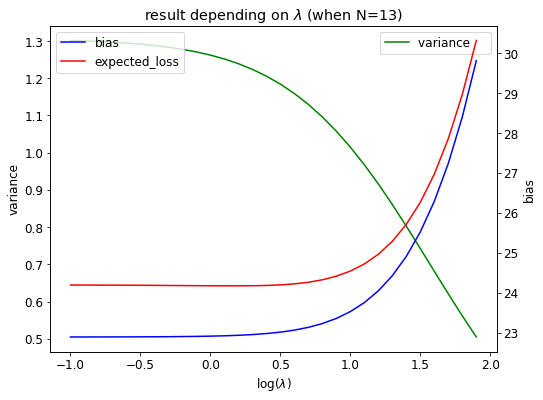

In [67]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

fig, ax1 = plt.subplots()
ax1.plot(np.log10(lambda_list_log), result[12,:,2], label='variance    ', color='green')
ax1.set_xlabel('log($\lambda$)')
ax1.set_ylabel('variance')

ax2 = ax1.twinx()
ax2.plot(np.log10(lambda_list_log), result[12,:,1], label='bias', color='blue')
ax2.set_ylabel('bias')
ax2.plot(np.log10(lambda_list_log), result[12,:,0], label='expected_loss', color='red')

ax1.legend(loc='best')
ax2.legend(loc='best')
plt.title('result depending on $\lambda$ (when N=13)')
plt.savefig('result depending on $\lambda$ (when N=13).png')
plt.show()

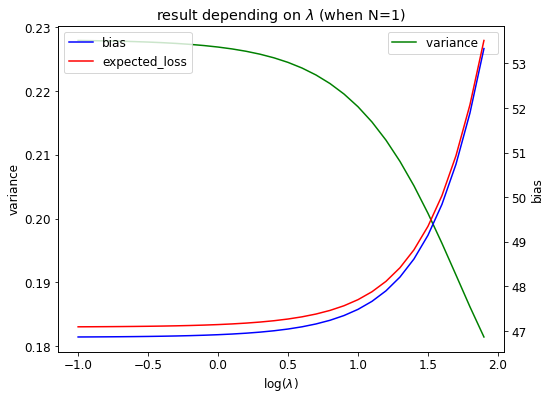

In [68]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

fig, ax1 = plt.subplots()
ax1.plot(np.log10(lambda_list_log), result[0,:,2], label='variance    ', color='green')
ax1.set_xlabel('log($\lambda$)')
ax1.set_ylabel('variance')

ax2 = ax1.twinx()
ax2.plot(np.log10(lambda_list_log), result[0,:,1], label='bias', color='blue')
ax2.set_ylabel('bias')
ax2.plot(np.log10(lambda_list_log), result[0,:,0], label='expected_loss', color='red')

ax1.legend(loc='best')
ax2.legend(loc='best')
plt.title('result depending on $\lambda$ (when N=1)')
plt.savefig('result_depending_on_lambda_N_1')
plt.show()

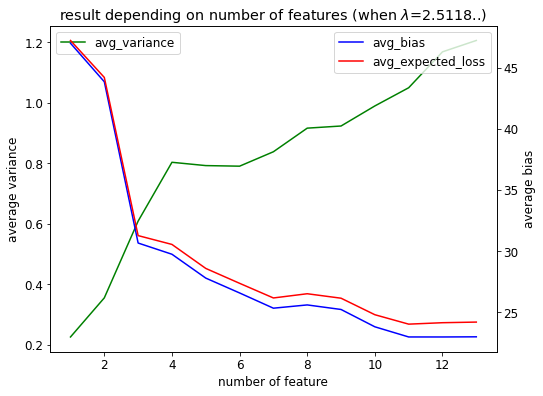

In [47]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

fig, ax1 = plt.subplots()
ax1.plot(range(1,num_feature+1), result[:,14,2], label='avg_variance', color='green')
ax1.set_xlabel('number of feature')
ax1.set_ylabel('average variance')

ax2 = ax1.twinx()
ax2.plot(range(1,num_feature+1), result[:,14,1], label='avg_bias', color='blue')
ax2.set_ylabel('average bias')
ax2.plot(range(1,num_feature+1), result[:,14,0], label='avg_expected_loss', color='red')

ax1.legend(loc='best')
ax2.legend(loc='best')
plt.title('result depending on number of features (when $\lambda$=2.5118..)')
plt.show()

In [48]:
#

/Users/munjungkim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/munjungkim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/munjungkim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30308 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/munjungkim/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54432 missing from current font.
  font.set_text(s, 0, flags=flags)


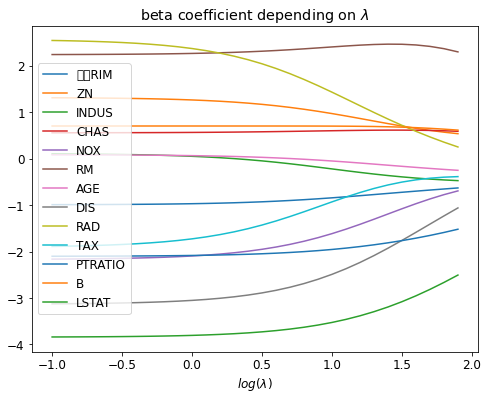

In [49]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

for i in range(13):
    plt.plot(np.log10(lambda_list_log), beta_record[:,i], label=variate_name[i] )
    

plt.title('beta coefficient depending on $\lambda$')
plt.xlabel('$log(\lambda$)')
plt.legend(loc='best')
plt.show()

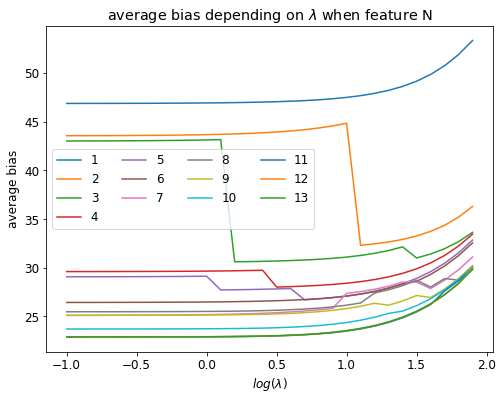

In [50]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

for i in range(13):
    plt.plot(np.log10(lambda_list), result[i,:,1], label=str(i+1))
    
plt.title('average bias depending on $\lambda$ when feature N')
plt.ylabel('average bias')
plt.xlabel('$log(\lambda)$')
plt.legend(loc='best', ncol=4)
plt.show()

# Uniform grid

In [51]:
feature = data[:,:13]
price = data[:,13]
lambda_list = np.linspace(0,10,100)


X_train, X_test, Y_train, Y_test = train_test_split(feature, price, test_size=0.2, random_state=1)


num_feature = 13
result = np.zeros((num_feature, len(lambda_list), 3)) # 3 ; avg_expected_loss, avg_bias, avg_var
beta_record = np.zeros((1,num_feature)) # 람다에 따라 beta가 어떻게 바뀌는지 관찰해보자

for i in range(len(lambda_list)):
    lamb = lambda_list[i]
    # all features 13
    avg_expected_loss, avg_bias, avg_var, avg_beta = bias_variance_decomp(X_train, Y_train, X_test, Y_test, 200, 200, 1, lamb)
    print(avg_beta.reshape(1,-1).shape)
    
    result[12,i,0] = avg_expected_loss
    result[12,i,1] = avg_bias
    result[12,i,2] = avg_var
    beta_record = np.vstack((beta_record, avg_beta.reshape((1,-1))))
    
    feature_order = important_feature(avg_beta) # 베타값의 인덱스를 크기 순서대로 받아옴
    
    for n in range(num_feature-1, 0 , -1): # feature 갯수 줄이기
        print("lambda : ", lamb, "feature : ", n)
        for k in range(n):
            index = feature_order[k]
            if k == 0:
                train_x = X_train[:,index].reshape((-1,1))
                test_x = X_test[:,index].reshape((-1,1))
            else:
                train_x = np.hstack((train_x, X_train[:,index].reshape((-1,1))))
                test_x = np.hstack((test_x, X_test[:,index].reshape((-1,1))))
        
        avg_expected_loss, avg_bias, avg_var, avg_beta = bias_variance_decomp(train_x, Y_train, test_x, Y_test, 200, 200, 1, lamb)
        result[n-1,i,0] = avg_expected_loss
        result[n-1,i,1] = avg_bias
        result[n-1,i,2] = avg_var

        
beta_record = beta_record[1:]   

(1, 13)
lambda :  0.0 feature :  12
lambda :  0.0 feature :  11
lambda :  0.0 feature :  10
lambda :  0.0 feature :  9
lambda :  0.0 feature :  8
lambda :  0.0 feature :  7
lambda :  0.0 feature :  6
lambda :  0.0 feature :  5
lambda :  0.0 feature :  4
lambda :  0.0 feature :  3
lambda :  0.0 feature :  2
lambda :  0.0 feature :  1
(1, 13)
lambda :  0.10101010101010101 feature :  12
lambda :  0.10101010101010101 feature :  11
lambda :  0.10101010101010101 feature :  10
lambda :  0.10101010101010101 feature :  9
lambda :  0.10101010101010101 feature :  8
lambda :  0.10101010101010101 feature :  7
lambda :  0.10101010101010101 feature :  6
lambda :  0.10101010101010101 feature :  5
lambda :  0.10101010101010101 feature :  4
lambda :  0.10101010101010101 feature :  3
lambda :  0.10101010101010101 feature :  2
lambda :  0.10101010101010101 feature :  1
(1, 13)
lambda :  0.20202020202020202 feature :  12
lambda :  0.20202020202020202 feature :  11
lambda :  0.20202020202020202 feature :  1

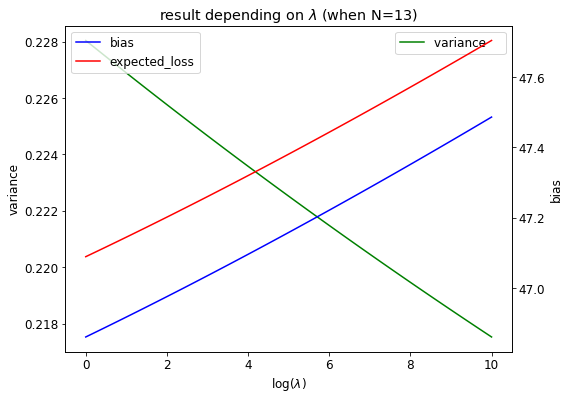

In [52]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

fig, ax1 = plt.subplots()
ax1.plot(lambda_list, result[0,:,2], label='variance    ', color='green')
ax1.set_xlabel('log($\lambda$)')
ax1.set_ylabel('variance')

ax2 = ax1.twinx()
ax2.plot(lambda_list, result[0,:,1], label='bias', color='blue')
ax2.set_ylabel('bias')
ax2.plot(lambda_list, result[0,:,0], label='expected_loss', color='red')

ax1.legend(loc='best')
ax2.legend(loc='best')
plt.title('result depending on $\lambda$ (when N=13)')
plt.show()

# Grid search with p and lambda : visualization

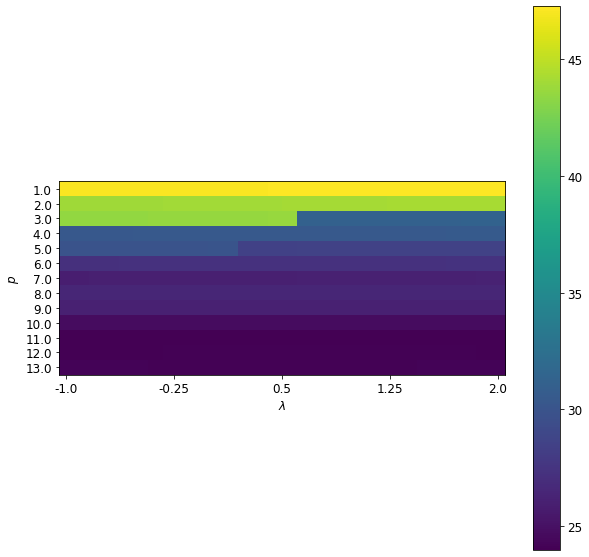

In [53]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(result[:,0:30,0])

plt.colorbar()
plt.xlabel('$\lambda$')
plt.xticks(np.linspace(0,29,5),np.linspace(-1,2,5))
plt.yticks(np.linspace(0,12,13),np.linspace(1,13,13))

plt.ylabel('$p$')
plt.show()

In [54]:
np.where(result==result[:,:,0].min())

(array([10]), array([11]), array([0]))

In [55]:
lambda_list[11]

1.1111111111111112

In [56]:
result[:,3,0]

array([47.10626275, 43.9379251 , 43.49830579, 30.44223967, 29.96009119,
       27.26319742, 26.00481773, 26.45700024, 26.10467543, 24.7605773 ,
       24.00286665, 24.03721173, 24.18411296])

In [57]:
result[:,:,0].min()

23.99556974003172

In [58]:
np.sqrt(result[:,:,0].min())

4.898527303183245